## Prompt: 
I have to manually code up the python script for single sine PEIS
help me write it, end result in .txt form with 2 columns, one the time (s) the other the voltage (V)
parameters: amplitude of wave 10mV, from 0.01Hz to 200kHz, PEIS, 10 logarithmic points per decade. uh what else do you need? if that's it, help me generate the python script sampled at a flexible time separation (maybe like 1ms for now? but variable so i can change)

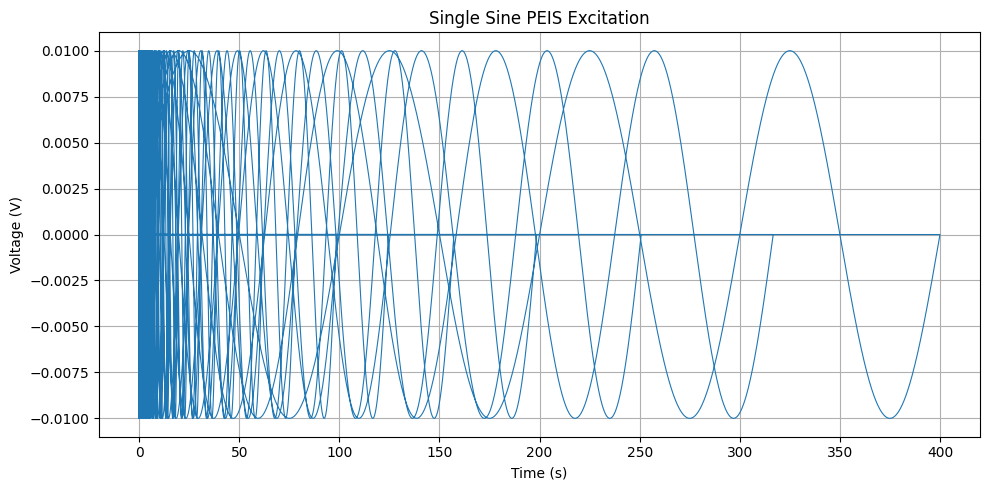

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Parameters ----
amplitude = 0.01       # 10mV sine wave, in V
f_min = 0.01           # Minimum frequency, Hz
f_max = 200000         # Maximum frequency, Hz
points_per_decade = 10 # Logarithmic steps per decade
sample_interval = 0.001 # Time separation between samples, seconds (1ms)
cycles_per_frequency = 4 # Number of cycles per frequency

# ---- Calculate frequencies ----
decades = np.log10(f_max) - np.log10(f_min)
n_freqs = int(decades * points_per_decade)
frequencies = np.logspace(np.log10(f_min), np.log10(f_max), n_freqs)

# ---- Generate data ----
times = []
voltages = []

for f in frequencies:
    period = 1.0 / f
    num_cycles = cycles_per_frequency
    t_end = num_cycles * period
    t = np.arange(0, t_end, sample_interval)
    v = amplitude * np.sin(2 * np.pi * f * t)
    times.extend(t)
    voltages.extend(v)

# ---- Plot with pyplot ----
plt.figure(figsize=(10, 5))
plt.plot(times, voltages, linewidth=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Single Sine PEIS Excitation')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- Write to .txt ----
with open('single_sine_PEIS.txt', 'w') as file:
    for time, voltage in zip(times, voltages):
        file.write(f"{time:.6f}\t{voltage:.6f}\n")
